<a href="https://colab.research.google.com/github/worklifesg/Natural-Language-Processing/blob/main/Projects/%202.%20Spam%20Ham%20Detection%20Project/Spam_Ham_Detection_and_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3 align='center'>Spam/Ham Detection and Patterns </h3> 

In this program, spam filter for text messages using NLP is performed. 

- Before applying machine learning algorithms to predict whether the text message is spam or not, <b> data pre-processing and exploring data analysis </b> is perfomed using NLP pre-processing techniques.
- <b> Data Pre-processing </b> includes <b> Normalization, removing specific strings </b> such as email addresses, URLs, money symbols, phone numbers and numbers. Also <b> removing puntuations, stop words, and stemming </b> is performed.
- Next <b> feature engineering </b> is done through <b> Tokenization using Ngrams and TF-IDF statistics. </b>
- A robust classifier is built with splitting the data into train and test with <b> 70/30 split ratio </b> . The training model is tested to built with different ensemble methods such as <b> Random Forest, XGBoost, AdaBoost, CatBoost and LightGBM classifiers. </b> Also, Naives Bayes has achieved better results before, so ensemble methods will be tested out with NB.



---



---



##### 1. Import Libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split, learning_curve,GridSearchCV,cross_val_score,StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from catboost import CatBoostClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

##### 2. Reading, Preprocessing and Exploring dataset

In [2]:
#reading dataset from SMSSpamCollection.txt
df = pd.read_table('SMSSpamCollection.txt',header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Checking dataset information to verify if there is any null text

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
#Renaming the columns '0' and '1' by label and text. In this problem we have two labels (spam and ham)

df = df.rename(columns={0:'Label', 1:'Text'})
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Total number of texts: 5572
Number of Spam Texts: 747
Nubmer of Ham texts: 4825


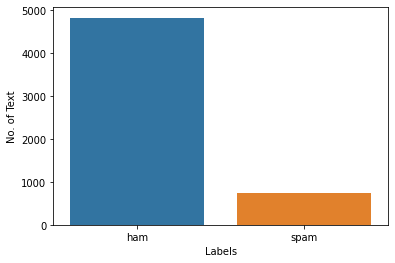

In [5]:
#Checking number of ham and spam texts
print('Total number of texts: {}'.format(df.shape[0]))
print('Number of Spam Texts: {}'.format(df[df.Label=='spam'].shape[0]))
print('Nubmer of Ham texts: {}'.format(df[df.Label=='ham'].shape[0])) 

ax = sns.countplot(df['Label'],label="Labels")
plt.ylabel('No. of Text');
plt.xlabel('Labels');

<b> <i> The given dataset is imbalanced therefore the predicted model can be baised in certain cases </i> </b>

Before jumping to text pre-processing let us explore the data thorugh data visualization (histograms, wordcloud)


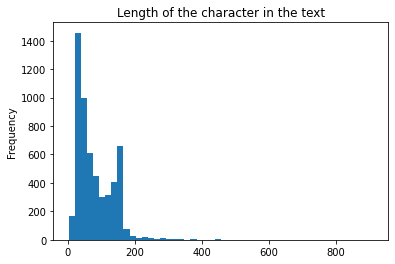

In [6]:
plt.figure(figsize=(6,4))
plt.hist(x=df['Text'].map(lambda x:len(x)), bins=50);
plt.ylabel('Frequency')
plt.title('Length of the character in the text');


In [7]:
#let us check a text of length

df['Length'] = df['Text'].apply(len) #adding Length column in dataframe
print('Max Length: ',df['Length'].max())
df.head()

Max Length:  910


,Label,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
#largest text in dataset
df[df['Length']==910]['Text'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [9]:
#Create a word cloud for spam and ham words in a text message
nltk.download('punkt')
#empty list of ham and spam
words_ham = ''
words_spam = ''

#using for loop to check label with spam and ham and use tokenize to convert sentence to words

for i in df[df['Label']=='spam'].Text:
  text = i.lower()
  tokens = nltk.word_tokenize(text)
  for words in tokens:
    words_spam = words_spam + words + ' '

for i in df[df['Label']=='ham'].Text:
  text = i.lower()
  tokens = nltk.word_tokenize(text)
  for words in tokens:
    words_ham = words_ham + words + ' '

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


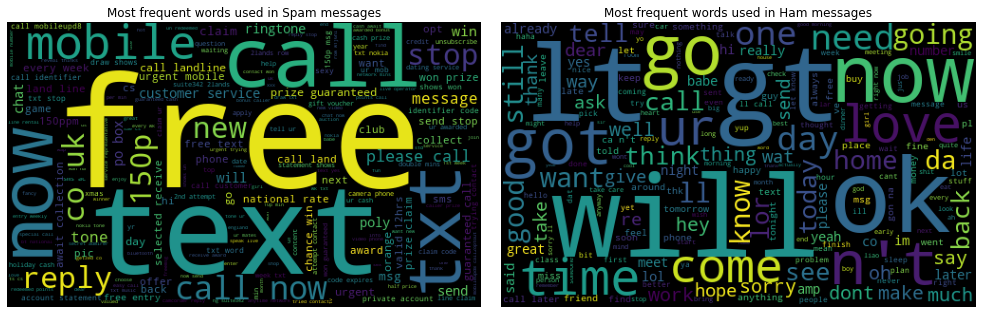

In [10]:
wcloud_spam = WordCloud(width=500,height=300).generate(words_spam)
wcloud_ham = WordCloud(width=500,height=300).generate(words_ham)

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(wcloud_spam)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Most frequent words used in Spam messages');
plt.subplot(122)
plt.imshow(wcloud_ham)
plt.axis('off')
plt.tight_layout(pad=2)
plt.title('Most frequent words used in Ham messages');

In [11]:
# we can replace spam ham by 0,1 by replace or using LabelEncoder

df = df.replace(['ham','spam'],[0,1])
df.head()

,Label,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


##### Text Pre-processing

In [12]:
import string
import re
porter = nltk.PorterStemmer()
#defining the function to have text pre-processing


email = r'\b[\w\-.]+?@\w+?\.\w{2,4}\b' # Replace email addresses with 'emailaddr'
http =  r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)' #Replace URLs with 'httpaddr'
money_sym = r'£|\$' # Replace money symbols with 'moneysymb'
phone = r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b' # Replace phone numbers with 'phonenumbr'
number = r'\d+(\.\d+)?' #Replace numbers with 'numbr'
punct =  r'[^\w\d\s]'#Remove punctuation
white_space = r'\s+' #Replace whitespace between terms with a single space
leadtrail_whitespace = r'^\s+|\s+?$' # Remove leading and trailing whitespace

# Access stop words
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')


def text_processing(text_message):
  assert(type(text_message)==str)

  text_clean = re.sub(email,'emailaddr',text_message)
  text_clean = re.sub(http,'httpaddr',text_clean)
  text_clean = re.sub(money_sym, 'moneysymb',text_clean)
  text_clean = re.sub(phone, 'phonenumbr',text_clean)
  text_clean = re.sub(number,'numbr',text_clean)
  text_clean = re.sub(punct, ' ',text_clean)
  text_clean = re.sub(white_space,' ',text_clean)
  text_clean = re.sub(leadtrail_whitespace,'',text_clean.lower()) #.lower (normalization)

  return ' '.join(
      porter.stem(term)
      for term in text_clean.split()
      if term not in set(stop_words)
  )




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
example = """  ***** CONGRATlations **** You won 2 tIckETs to Hamilton in 
NYC http://www.hamiltonbroadway.com/J?NaIOl/event   wORtH over $500.00...CALL 
555-477-8914 or send message to: hamilton@freetix.com to get ticket !! !  """
text_processing(example)

'congratl numbr ticket hamilton nyc httpaddr worth moneysymbnumbr call phonenumbr send messag emailaddr get ticket'

##### Feature Engineering(Using Tokenization)

In [14]:
#we will design Ngram model with TFIDF statistics

processed_text = df['Text'].apply(text_processing)

vector = TfidfVectorizer(ngram_range=(1,2))
Ngrams = vector.fit_transform(processed_text)

Ngrams.shape

(5572, 36348)

##### Building classifier, training and prediction

In [15]:
#splitting the data 70/30

X_train, X_test, y_train, y_test = train_test_split(Ngrams,
                                                    df['Label'],
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=df['Label'])

print('Training size : ',X_train.shape)
print('Testing size : ', X_test.shape)

Training size :  (3900, 36348)
Testing size :  (1672, 36348)


<h3> Prediction Models </h3>

Here we will explore predictive models (algorithms) to compare their predicted accuracy (Area Under Curve (AUC), Confusion Matrix). The models are built using following techniques:

<b>Ensemble Methods:</b>

  1. RandomForestClassifier
  2. AdaBoostClassifier
  3. CatBoostClassifier
  4. XGBoost
  5. LightGBM

But before going to algorithms, we have to choose performance metric to be used to evaluate these algorithms. 

In general there are 15+ performance metrics, but it depends upon certain factors such as:

  1. <b>Classifier Selection</b>
  
      <i>Like KNN doesn't have Feature Selection and instead has Permutation Feature Selection</i>
  
  
  2. <b>Imbalanced Data</b> - Better to use ROC-AUC instead of accuracy_score as latter will give trustworthy results when there is balanced data.
  
<b> List of performance metrics used for classification problems:</b>

  1. Accuracy
  2. Confusion Matrix
  3. Feature Importance (Not a performance metric but a technique for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction)
  4. Log Loss
  5. ROC-AUC Score
  6. Precision-Recall AUC | Average precision
  7. F1 Score
  8. F2 Score
  9. Cohen Kappa
  10. Matthews correlation coefficient
  11. Kolmogorov-Smirnov statistics
  12. F beta
  13. Precision
  14. Sensitivity
  15. Hinge Loss
  16. Jaccard Score
  17. Zero One Classification Loss
  18. Recall

We will use <b> Confusion Matrix, ROC-AUC, classfification report (precision, recall and F1)  </b> 

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix

def plot_confusion_matrix(y_test,prediction):
  plt.figure(figsize=(8,6))
  cm = pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'])
  sns.heatmap(cm, 
              xticklabels=['Ham', 'Spam'],
              yticklabels=['Ham', 'Spam'],
              annot=True,
              linewidths=.2,linecolor="Darkblue", cmap="Blues")
  plt.title('Confusion Matrix', fontsize=14)
  plt.show()

def roc(y_test,predictions):
  roc_score = roc_auc_score(y_test, predictions)
  print('The ROC-AUC score of the test dataset is: %0.3f'%roc_score)

def class_report(y_test,predictions):
  class_report_score=classification_report(y_test, predictions)
  print('The classification report is: \n',class_report_score)

pred_roc = [] #to store roc score
false_positive =[] # to store false positives
false_negative = [] #to store false negatives


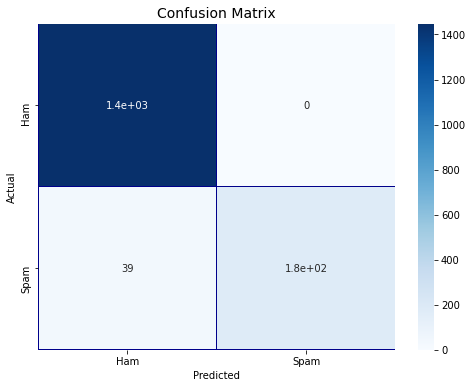

The ROC-AUC score of the test dataset is: 0.913
The classification report is: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       1.00      0.83      0.90       224

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [17]:
# Random Forest Classifier

clf = RandomForestClassifier(n_jobs=4, 
                             random_state=21,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
clf.fit(X_train,y_train)
preds=clf.predict(X_test)

plot_confusion_matrix(y_test,preds)
roc(y_test,preds)
class_report(y_test,preds)


pred_roc.append(('RF', roc_auc_score(y_test,preds)))
false_positive.append(('RF', confusion_matrix(y_test, preds)[0][1]))
false_negative.append(('RF', confusion_matrix(y_test, preds)[1][0]))

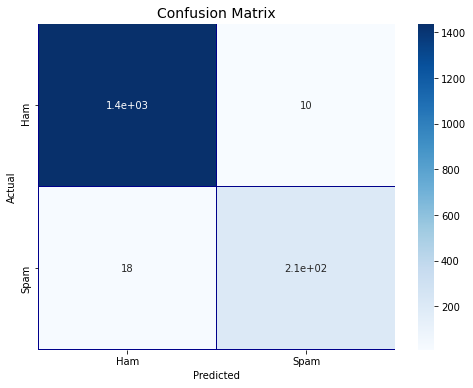

The ROC-AUC score of the test dataset is: 0.956
The classification report is: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1448
           1       0.95      0.92      0.94       224

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [18]:
# AdaBoost Classifier

clf2 = AdaBoostClassifier(random_state=21,
                             algorithm='SAMME.R',
                             learning_rate=0.8,
                             n_estimators=100)

clf2.fit(X_train,y_train)
preds2=clf2.predict(X_test)

plot_confusion_matrix(y_test,preds2)
roc(y_test,preds2)
class_report(y_test,preds2)

pred_roc.append(('AdaB', roc_auc_score(y_test,preds2)))
false_positive.append(('AdaB', confusion_matrix(y_test, preds2)[0][1]))
false_negative.append(('AdaB', confusion_matrix(y_test, preds2)[1][0]))

0:	total: 2.3s	remaining: 19m 6s
50:	total: 46.9s	remaining: 6m 53s
100:	total: 1m 34s	remaining: 6m 12s
150:	total: 2m 23s	remaining: 5m 31s
200:	total: 3m 14s	remaining: 4m 49s
250:	total: 4m 3s	remaining: 4m 1s
300:	total: 4m 51s	remaining: 3m 12s
350:	total: 5m 40s	remaining: 2m 24s
400:	total: 6m 29s	remaining: 1m 36s
450:	total: 7m 17s	remaining: 47.5s
499:	total: 8m 6s	remaining: 0us


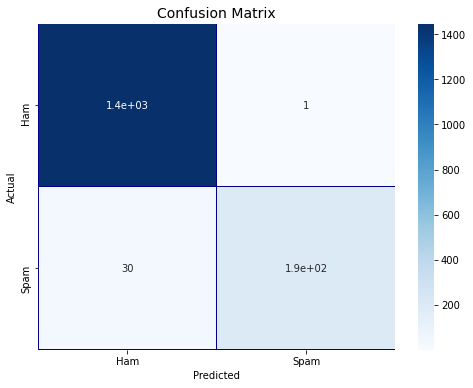

The ROC-AUC score of the test dataset is: 0.933
The classification report is: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.87      0.93       224

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [19]:
# CatBoost Classifier

clf3 = CatBoostClassifier(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='AUC',
                         random_seed=21,
                         bagging_temperature=0.2,
                         od_type='Iter',
                         metric_period=50,
                         od_wait=100)

clf3.fit(X_train,y_train)
preds3=clf3.predict(X_test)

plot_confusion_matrix(y_test,preds3)
roc(y_test,preds3)
class_report(y_test,preds3)

pred_roc.append(('CatB', roc_auc_score(y_test,preds3)))
false_positive.append(('CatB', confusion_matrix(y_test, preds3)[0][1]))
false_negative.append(('catB', confusion_matrix(y_test, preds3)[1][0]))

In [20]:
# XGBoost Classifier
# For XGBoost to run efficiently, we have to convert our dataset to DMatrix format
# Dmatrix format is data structure unique for xgboost algorithm

D_train = xgb.DMatrix(X_train,y_train)
D_test  = xgb.DMatrix(X_test,y_test)

#intialize set of parameters

param={'eta':0.039,'max_depth':2,'objective':'binary:logistic','silent': True,
       'subsample':0.8,'colsample_bytree':0.9,'eval_metric':'auc','random_state':42}

#What to monitor (in this case, **train** and **test**)
watchlist = [(D_train, 'train'), (D_test, 'test')]
xgb_model = xgb.train(param, D_train,1000,watchlist,early_stopping_rounds=250,maximize=True)

preds4=xgb_model.predict(D_test)
roc(y_test,preds4)

pred_roc.append(('XGB', roc_auc_score(y_test,preds4)))

[0]	train-auc:0.832913	test-auc:0.83203
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 250 rounds.
[1]	train-auc:0.933823	test-auc:0.935849
[2]	train-auc:0.939671	test-auc:0.940292
[3]	train-auc:0.93386	test-auc:0.934548
[4]	train-auc:0.940607	test-auc:0.940156
[5]	train-auc:0.940903	test-auc:0.94023
[6]	train-auc:0.940903	test-auc:0.94023
[7]	train-auc:0.940908	test-auc:0.94023
[8]	train-auc:0.951067	test-auc:0.949448
[9]	train-auc:0.952878	test-auc:0.952214
[10]	train-auc:0.952878	test-auc:0.952214
[11]	train-auc:0.952878	test-auc:0.952214
[12]	train-auc:0.952933	test-auc:0.95218
[13]	train-auc:0.952982	test-auc:0.952182
[14]	train-auc:0.953029	test-auc:0.95216
[15]	train-auc:0.958998	test-auc:0.960868
[16]	train-auc:0.962171	test-auc:0.96194
[17]	train-auc:0.962157	test-auc:0.961679
[18]	train-auc:0.962209	test-auc:0.962114
[19]	train-auc:0.962179	test-auc:0.961685
[20]	train-auc:0.96218	test-auc:0.96

In [21]:
#LightGBM Classifier

D_train_GBM = lgb.Dataset(X_train,label=y_train)
D_test_GBM = lgb.Dataset(X_test,y_test)

#intialize set of parameters

param={
    'boosting_type':'gbdt','objective':'binary',
    'metric':'auc','learning_rate':0.05,'num_leaves':7,
    'max_depth':4,'min_child_samples':100,
    'max_bin':100, 'subsample':0.9,'subsample_freq':1,
    'colsample_bytree':0.7,'min_child_weight':0,
    'min_split_gain':0,'nthread':8,'verbose':0,
    'scale_pos_weight':150
}

evals_results = {}

lgb_model = lgb.train(param, 
                  D_train_GBM, 
                  valid_sets=[D_train_GBM, D_test_GBM], 
                  valid_names=['train','test'], 
                  evals_result=evals_results, 
                  num_boost_round=1000,
                  early_stopping_rounds=250,
                  verbose_eval=50, 
                  feval=None)
preds5 = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

pred_roc.append(('LightGBM', roc_auc_score(y_test,preds5)))

Training until validation scores don't improve for 250 rounds.
[50]	train's auc: 0.968839	test's auc: 0.958066
[100]	train's auc: 0.976388	test's auc: 0.966193
[150]	train's auc: 0.98193	test's auc: 0.971181
[200]	train's auc: 0.987168	test's auc: 0.973396
[250]	train's auc: 0.988602	test's auc: 0.974324
[300]	train's auc: 0.98958	test's auc: 0.974475
[350]	train's auc: 0.990019	test's auc: 0.974827
[400]	train's auc: 0.990317	test's auc: 0.974686
[450]	train's auc: 0.99132	test's auc: 0.97483
[500]	train's auc: 0.991744	test's auc: 0.975103
[550]	train's auc: 0.991959	test's auc: 0.975248
[600]	train's auc: 0.992265	test's auc: 0.975354
[650]	train's auc: 0.992641	test's auc: 0.975544
[700]	train's auc: 0.992879	test's auc: 0.975534
[750]	train's auc: 0.993063	test's auc: 0.974033
[800]	train's auc: 0.993172	test's auc: 0.975445
[850]	train's auc: 0.993253	test's auc: 0.973906
Early stopping, best iteration is:
[612]	train's auc: 0.992439	test's auc: 0.975702


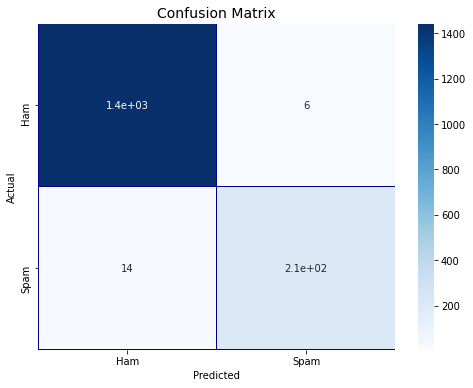

The ROC-AUC score of the test dataset is: 0.967
The classification report is: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.97      0.94      0.95       224

    accuracy                           0.99      1672
   macro avg       0.98      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672



In [22]:
nb = MultinomialNB(alpha=0.2)

nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

plot_confusion_matrix(y_test,pred_nb)
roc(y_test,pred_nb)
class_report(y_test,pred_nb)

pred_roc.append(('NB', roc_auc_score(y_test,pred_nb)))
false_positive.append(('NB', confusion_matrix(y_test, pred_nb)[0][1]))
false_negative.append(('NB', confusion_matrix(y_test, pred_nb)[1][0]))

In [23]:
predictions_df = pd.DataFrame(pred_roc,columns=['Classifier','ROC Score'])
predictions_df

,Classifier,ROC Score
0,RF,0.912946
1,AdaB,0.956368
2,CatB,0.932690
3,XGB,0.980313
4,LightGBM,0.975702
5,NB,0.966678


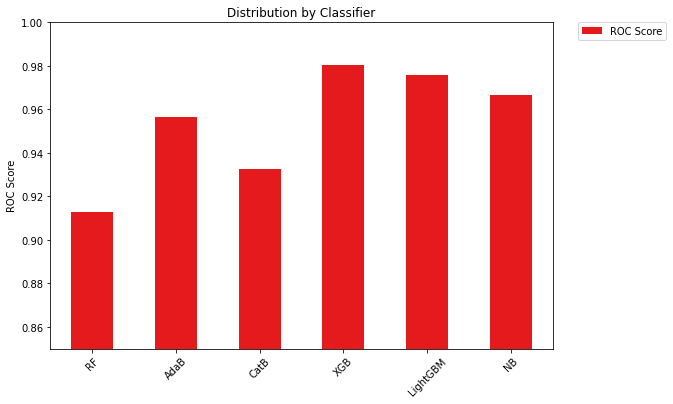

In [24]:
predictions_df.plot(kind='bar', ylim=(0.85,1.0), figsize=(9,6), align='center',colormap='Set1');
plt.xticks(np.arange(6), predictions_df.Classifier, rotation=45)
plt.ylabel('ROC Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [25]:
FP_df = pd.DataFrame(false_positive,columns=['Classifier','False Positive'])
FP_df

,Classifier,False Positive
0,RF,0
1,AdaB,10
2,CatB,1
3,NB,6


In [26]:
FN_df = pd.DataFrame(false_negative,columns=['Classifier','False Negative'])
FN_df

,Classifier,False Negative
0,RF,39
1,AdaB,18
2,catB,30
3,NB,14


In [27]:
total_type12_error = FP_df['False Positive']+FN_df['False Negative']

total_type12_error

0    39
1    28
2    31
3    20
dtype: int64

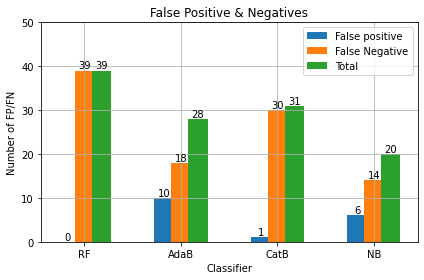

In [28]:
fig, ax = plt.subplots()

x = np.arange(len(FP_df.Classifier))
fp = ax.bar(x-0.35/2, FP_df['False Positive'], 0.2, label='False positive')
fn = ax.bar(x, FN_df['False Negative'], 0.2, label='False Negative')
total = ax.bar(x+0.35/2, total_type12_error, 0.2, label='Total')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of FP/FN')
ax.set_title('False Positive & Negatives')
ax.set_xticks(x)
ax.set_xticklabels(FP_df.Classifier)
ax.set_xlabel('Classifier')
ax.set_ylim(0,50)
ax.grid()
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(fp)
autolabel(fn)
autolabel(total)

fig.tight_layout()

plt.show()